In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Datasets

## 1) Text_emotion.csv Dataset

In [31]:
df = pd.read_csv('./Data/text_emotion.csv')

In [32]:
len(df)

40000

##### shows that we have the alot of data which is good

In [33]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [35]:
len(vocabulary_size('content',df))

83294

I now proceed to display the number of text per sentiment

In [5]:
sentiments = df.groupby('sentiment').agg('size')
sentiments = pd.DataFrame(sentiments)

In [6]:
sentiments = sentiments.rename(columns={0: 'sentiment count'}, inplace=False)

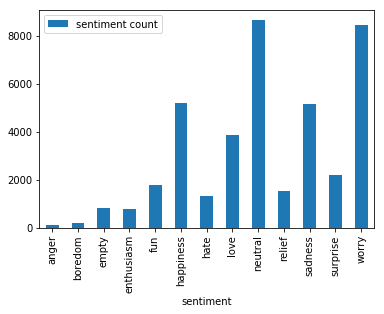

In [7]:
sentiments.plot.bar(rot=90)
plt.show()

## EmotionPhrases.csv dataset
#### I proceed to reading the other dataset containing text with their labeled emotions

In [7]:
messages = pd.read_csv('./Data/EmotionPhrases.csv')
grouped_messages = pd.DataFrame(messages.groupby('Sentiment').agg('size'))
grouped_messages = grouped_messages.rename(columns={0:'sentiment_Count'})

In [24]:
messages.head()

,Sentiment,Content
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [11]:
len(messages)

7652

In [10]:
grouped_messages

,sentiment_Count
Sentiment,
anger,1094
disgust,1094
fear,1093
guilt,1091
joy,1092
sadness,1094
shame,1094


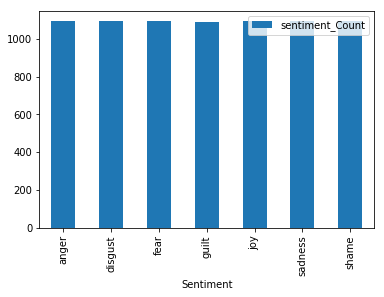

In [25]:
grouped_messages.plot.bar(rot=90)
plt.show()

vocabulary size

In [28]:
len(vocabulary_size('Content',messages))

17080

In [26]:
sentiments_groups = []
for gr,df in messages.groupby('Sentiment'):
    sentiments_groups.append(df)

### I proceed in showing the various tweets per category

1) Anger

In [20]:
sentiments_groups[0].head()

,Sentiment,Content
2,anger,When I had been obviously unjustly treated and...
9,anger,When a car is overtaking another and I am forc...
16,anger,When one is unjustly accused of something one ...
23,anger,Friends who torture animals.
30,anger,When my partner was attacked and lost three te...


2) Disgust

In [21]:
sentiments_groups[1].head()

,Sentiment,Content
4,disgust,At a gathering I found myself involuntarily si...
11,disgust,When I found a bristle in the liver paste tube.
18,disgust,When one finds out that someone you know is no...
25,disgust,Friends who torture animals.
32,disgust,When I nearly walked on a blindworm and then s...


3) Fear

In [24]:
sentiments_groups[2].head()

,Sentiment,Content
1,fear,Every time I imagine that someone I love or I ...
8,fear,"When, for the first time I realized the meanin..."
15,fear,When one has arranged to meet someone and that...
22,fear,When I climbed up a tree to pick apples. The ...
29,fear,When my 2 year old son climbed up and sat on t...


4) Guilt

In [26]:
sentiments_groups[3].head()

,Sentiment,Content
6,guilt,I feel guilty when when I realize that I consi...
13,guilt,When I think that I do not study enough. Afte...
20,guilt,When one has neglected or been unjust to a goo...
27,guilt,[ When excuses are necessary and I get out of ...
34,guilt,I experience a sense of guilt as my middle son...


5) Joy

In [27]:
sentiments_groups[4].head()

,Sentiment,Content
0,joy,[ On days when I feel close to my partner and ...
7,joy,After my girlfriend had taken her exam we went...
14,joy,When I pass an examination which I did not thi...
21,joy,Passing an exam I did not expect to pass.
28,joy,When I had my children.


6) Sadness

In [28]:
sentiments_groups[5].head()

,Sentiment,Content
3,sadness,When I think about the short time that we live...
10,sadness,When I recently thought about the hard work it...
17,sadness,When one's studies seem hopelessly difficult a...
24,sadness,[ Same as in anger.]
31,sadness,When I see children on T.V from areas devastat...


In [29]:
sentiments_groups[6].head()

,Sentiment,Content
5,shame,When I realized that I was directing the feeli...
12,shame,"When I was tired and unmotivated, I shouted at..."
19,shame,"When one has been unjust, stupid towards someo..."
26,shame,[ Same as above - friends who torture animals.]
33,shame,When I saw my 18 year old son grab an oxygen m...



## 2) Cornell Dataset Extracting

What I noticed in the dataset so far just by doing a control find on the basic emotions of the Eckman Model which are :

- Anger 799 appearances 
- Disgust. 84 appearances
- Fear. 342
- Happiness 968
- Sadness. 524
- Surprise  477

I did a keyword search for these specific words without  using synonyms of the terms and I notted down the occurences



### I now proceed in extracting the movie_lines Dataset

In [3]:
with open('./Data/cornell movie-dialogs corpus/movie_lines.txt',encoding='utf-8', errors ='ignore') as file:
    data = file.readlines()    

In [4]:
data_array = []

da = []
for line in data :
    split_string = line.split('+++$+++')
    dict_values = {'movieID':split_string[2], 'character name':split_string[3], 'utterance': split_string[4]}
    
    #data_array.append(dict_values)
    da.append(dict_values['utterance'])

len(da)

304713

In [ ]:
movie_lines_df = pd.DataFrame(data_array)

Perhaps we just group for now per film. Perhaps there might be an interesting for future use

In [19]:
films = []
for groups, df in movie_lines_df.groupby('movieID') :
    films.append(df)

In [20]:
aggregated_utterance_size = movie_lines_df.groupby('movieID').agg('size')


In [52]:
cleaned_data = [d[1:-1] for d in da ]

list

## 3) HappyDB dataset

In [38]:
import gensim 

Using TensorFlow backend.
/Users/francisdamachi/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Choice of dataset

- We have 3 dataset proposition :
    - text_emotion.csv 
    - Emotion_phrases.csv
    - HappyDb
    

In [39]:
df = pd.read_csv("cleaned_hm.csv")

In [40]:
df.columns

Index(['hmid', 'wid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category'],
      dtype='object')

In [41]:
df = df.fillna(value=" ", axis= 1)

I take out the senteces that do not have a ground truth

In [42]:
df = df.loc[df.ground_truth_category !=' ']

dataset length

In [44]:
len(df)

14125

In [43]:
len(vocabulary_size('cleaned_hm',df))

17757

It seems to me that some of the labels don't really reflect an emotion for example exercise, leisure, nature. 
But rather a topic or a feeling. We can see the distribution of the number of labeled la

In [44]:
df.groupby('ground_truth_category').agg('size')

ground_truth_category
achievement         4276
affection           4810
bonding             1750
enjoy_the_moment    1514
exercise             217
leisure             1306
nature               252
dtype: int64

Lets try to see for example the types of generated sentences based on nature, in order
to see if there is a relation between the sentence and the notion of happiness



In [60]:
def get_df_per_label(label,df):
    return df.loc[df.ground_truth_category== label].head() 

In [61]:
get_df_per_label('nature',df)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
146,27819,496,24h,After 3 long weeks of deep snow covered ground...,After 3 long weeks of deep snow covered ground...,True,2,nature,nature
240,27913,396,24h,"The weather is very sultry in our place, our A...","The weather is very sultry in our place, our A...",True,3,nature,nature
344,28017,12580,24h,One last azalea bloom came out today and I was...,One last azalea bloom came out today and I was...,True,1,nature,nature
647,28320,563,24h,I went for a walk early in the morning and air...,I went for a walk early in the morning and air...,True,1,nature,nature
675,28348,2669,24h,I sat outside in my backyard and enjoyed the g...,I sat outside in my backyard and enjoyed the g...,True,1,nature,nature


In [62]:
get_df_per_label('leisure',df)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
5,27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
50,27723,389,24h,I went shopping,I went shopping,True,1,leisure,leisure
165,27838,5,24h,I was able to play my video game that I enjoy ...,I was able to play my video game that I enjoy ...,True,1,leisure,leisure
346,28019,496,24h,I was able to find time to go have my hair cut...,I was able to find time to go have my hair cut...,True,1,leisure,achievement
396,28069,1672,24h,I made a delicious meal using fresh ingredient...,I made a delicious meal using fresh ingredient...,True,1,leisure,leisure


In [63]:
get_df_per_label('enjoy_the_moment', df)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
51,27724,10576,24h,The phone that I have ordered in a local onlin...,The phone that I have ordered in a local onlin...,True,2,enjoy_the_moment,enjoy_the_moment
86,27759,648,24h,INDIA WON THE SERIES AGAINST AUSTRALIA MADE ME...,INDIA WON THE SERIES AGAINST AUSTRALIA MADE ME...,True,1,enjoy_the_moment,enjoy_the_moment
162,27835,786,24h,I ate some peanut butter M&Ms while watching J...,I ate some peanut butter M&Ms while watching J...,True,2,enjoy_the_moment,enjoy_the_moment
267,27940,2794,24h,While buying medicine from a regular pharmacy ...,While buying medicine from a regular pharmacy ...,True,1,enjoy_the_moment,achievement
391,28064,2394,24h,My job provided lunch and it was really good.,My job provided lunch and it was really good.,True,1,enjoy_the_moment,enjoy_the_moment


In [64]:
get_df_per_label('achievement',df)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
53,27726,383,24h,I bought a new TV,I bought a new TV,True,1,achievement,achievement
62,27735,1377,24h,I slow cooked a chuck roast on my stove that c...,I slow cooked a chuck roast on my stove that c...,True,1,achievement,achievement
72,27745,1020,24h,I lost 2 kgs of weight after a month long effo...,I lost 2 kgs of weight after a month long effo...,True,1,achievement,achievement
73,27746,1625,24h,i finally learned to cook chicken\r\n,i finally learned to cook chicken\r\n,True,1,achievement,achievement
117,27790,72,24h,A made quite the progress on an old rusty work...,A made quite the progress on an old rusty work...,True,2,achievement,achievement


In [65]:
get_df_per_label('affection',df)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
24,27697,498,24h,My grandmother start to walk from the bed afte...,My grandmother start to walk from the bed afte...,True,1,affection,affection
91,27764,102,24h,My son results is today its got very good he s...,My son results is today its got very good he s...,True,1,affection,affection
103,27776,681,24h,My family went to a wildlife park. It was so b...,My family went to a wildlife park. It was so b...,True,2,affection,affection
149,27822,924,24h,My husband says me 'I love u ' when i woke up ...,My husband says me 'I love u ' when i woke up ...,True,1,affection,affection
172,27845,179,24h,I enjoyed play Soccer with my brother,I enjoyed play Soccer with my brother,True,1,affection,affection


In [45]:
import nltk as nl

In [1]:
def vocabulary_size(field,df):
    voc = set()
    sentences = []
    for line in df[field] :
        sentences.append(line.split(' '))

    for line in sentences:
        for word in line :
            voc.add(word)
            
            
    return voc

## 4) IMDB reviews dataset 

In [2]:
import glob
import re

In [3]:
import os

path_neg = '/Users/francisdamachi/Desktop/epfl/Master/Master_semester_project/Semester Project/Data/train/neg'
path_pos = '/Users/francisdamachi/Desktop/epfl/Master/Master_semester_project/Semester Project/Data/train/pos'




def ratings(path):
    files = os.listdir(path)
    rating = []

    for file in files :
        if(file[-5] == '0'):
            rating.append('10')
        else:
            rating.append(file[-5])

    return rating



In [4]:
rating_neg = ratings(path_neg)
rating_pos = ratings(path_pos)


In [5]:
rating_pos[:10]

['9', '8', '7', '8', '10', '8', '10', '10', '10', '10']

In [6]:
rating_neg[:10]

['4', '1', '4', '1', '3', '3', '4', '2', '1', '1']

In [7]:

def get_reviews(path_, rating):
    reviews = []

    files  = os.listdir(path_)


    for file in files :
        path_of_file = path_+'/'+file

        with open(path_of_file) as f :
            lines = f.readlines()
            reviews.append({'review':lines})


    review_rating =  zip(reviews,rating)
    
    rev_rat = [{'review': rev['review'][0], 'rating':rat} for rev,rat in review_rating ]
    
    return pd.DataFrame(rev_rat)



In [12]:
negative_reviews = get_reviews(path_neg,rating_neg)

In [13]:
positive_reviews = get_reviews(path_pos, rating_pos)

In [14]:
print("negative review size: ", len(negative_reviews))
print("positive review size: ", len(positive_reviews))
print("total size :", len(negative_reviews) + len(positive_reviews))

negative review size:  12500
positive review size:  12500
total size : 25000


In [15]:
voc_size_neg = vocabulary_size('review',negative_reviews)
voc_size_pos = vocabulary_size('review',positive_reviews)


In [16]:
print("vocabulary size negative reviews", len(voc_size_neg))
print("vocabulary size positive reviews", len(voc_size_pos))


vocabulary size negative reviews 176694
vocabulary size positive reviews 178885


# Dataset set summary

| Dataset            | Number of phrases | Labeled | Vocabulary Size | About                                                                                                                                                                     | Source      | How was it generated                                                                                                                                             | 
|--------------------|-------------------|---------|-----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------| 
| text_emotion.csv   | 40000             | Yes     | 83294           | "his dataset contains labels for the emotional content (such as happiness, sadness, and anger) of texts."                                                                 | CrowdFlower | CrowdFlower                                                                                                                                                      | 
| EmotionPhrases.csv | 7652              | Yes     | 17080           | Labeld dataset of twitter lines                                                                                                                                           | Twitter     | This dataset was collected using Twitter public streaming. The collected tweets were automatically labeled using the emotion hashtags at the end of each tweet.  | 
| HappyDb.csv        | 100535            | Yes     | 17757           | "Lines of happy moments. It seems to me that some of the labels don't really reflect an emotion for example exercise, leisure, nature. But rather a topic or a feeling. " | Kaggle      | "A Corpus of 100,000 Crowdsourced Happy Moments"                                                                                                                 | 
| IMDB reviews pos   | 12500             | No      | 178885          | These are IMBD positive reviews and the ratings associated with them.                                                                                                     | Kaggle      | IMDB dataset                                                                                                                                                     | 
| IMDB reviews neg   | 12500             | No      | 176694          | These are IMBD negative reviews and the ratings associated with them.                                                                                                     |  Kaggle          | IMDB dataset                                                                                                                                                     | 
